<a href="https://colab.research.google.com/github/zoribecca/Data_Science_Practice_Projects/blob/main/3MTT_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID-19 PROJECT

## Project Phases

1. Problem Statement
2. Data Acquisition
3. Preliminary Data Analysis
4. Data Inspection and Cleaning
5. EDA
6. Data Preprocessing
7. Building the Model
8. Building Time Series Model


### 1. Problem Statement

One of the biggest challenges faced by the Public Health Organization is how to effectively allocate health resources such as vaccines, quarantine facilities and medical staffs and make informed policies to prevent future outbreaks of Covid_19. This requires understanding the various factors responsible for the spread of the virus.

### Research Questions
The project is set to answer the following research questions:
1. What are the factors responsible for the spread of Covid_19?
2. How does the spread differ among countries/regions?
3. What predictive modeling system will be used to anticipate and prevent future outbreak?


### Project Objectives
The broad objective of this project is to develop a predictive model that provide insights into the factors responsible for the spread of Covid_19, thereby aiding Piblic Health Organization to allocate resources equitably and formulate policies to prevent future outbreaks.

Specifically, the project seek to:
1. To identify key factoors responsible for the spread of Covid_19.
2. To examine and compare the virus spread among differnt countries/regions.
3. To develop predictive modeling system that can anticipate and prevent future outbreaks.


### 2. Data Acquisition

###### Task 2.1 Download

###### Download the dataset [here](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### Task 2.2. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from sklearn.metrics import mean_squared_error

###### 2.3. Load Data into Pandas DataFrame

In [ ]:
# Load in the dataset
usa_wise = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/usa_county_wise.csv")
worldometer = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/worldometer_data.csv")
country_wise = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/country_wise_latest.csv")
covid_19 = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/covid_19_clean_complete.csv")
day_wise = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/day_wise.csv")
full_grouped = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/full_grouped.csv")

# Rename the Country/Region column
usa_wise.rename(columns={'Country_Region': 'Country'}, inplace=True)
worldometer.rename(columns={'Country/Region': 'Country'}, inplace=True)
country_wise.rename(columns={'Country/Region': 'Country'}, inplace=True)
covid_19.rename(columns={'Country/Region': 'Country'}, inplace=True)
day_wise.rename(columns={'Country/Region': 'Country'}, inplace=True)
full_grouped.rename(columns={'Country/Region': 'Country'}, inplace=True)

###### 2.4. Data Exploration

In [ ]:
full_grouped.info()  # Get data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           35156 non-null  object
 1   Country        35156 non-null  object
 2   Confirmed      35156 non-null  int64 
 3   Deaths         35156 non-null  int64 
 4   Recovered      35156 non-null  int64 
 5   Active         35156 non-null  int64 
 6   New cases      35156 non-null  int64 
 7   New deaths     35156 non-null  int64 
 8   New recovered  35156 non-null  int64 
 9   WHO Region     35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
full_grouped['Date'] = pd.to_datetime(full_grouped['Date']) # Convert 'Date' to datetime

In [ ]:
full_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           35156 non-null  datetime64[ns]
 1   Country        35156 non-null  object        
 2   Confirmed      35156 non-null  int64         
 3   Deaths         35156 non-null  int64         
 4   Recovered      35156 non-null  int64         
 5   Active         35156 non-null  int64         
 6   New cases      35156 non-null  int64         
 7   New deaths     35156 non-null  int64         
 8   New recovered  35156 non-null  int64         
 9   WHO Region     35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [ ]:
full_grouped.describe() # Summary statistics for numerical columns

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852


In [ ]:
full_grouped.head()  # View the first few rows

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [ ]:
full_grouped.tail()  # View the last few rows

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [ ]:
# Check for Missing Values:
print(full_grouped.isnull().sum())


Date             0
Country          0
Confirmed        0
Deaths           0
Recovered        0
Active           0
New cases        0
New deaths       0
New recovered    0
WHO Region       0
dtype: int64


In [ ]:
# Unique Values:
print(full_grouped['Country'].unique())  # List of unique countries
print(full_grouped['WHO Region'].unique()) # List of unique WHO Regions


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' '

### 3. Data preparation

###### 3.1. Feature engineering

In [ ]:
# Create columns for year, month, day, week, and quarters
full_grouped["Year"] = full_grouped["Date"].dt.year
full_grouped["Month"] = full_grouped["Date"].dt.month_name()
full_grouped["Day"] = full_grouped["Date"].dt.day_name()
full_grouped['Week'] = full_grouped['Date'].dt.isocalendar().week
full_grouped["Quarter"] = full_grouped["Date"].dt.quarter



In [ ]:
# Create columns for the following to get more insights from the dataset
full_grouped['Mortality Rate %'] = (full_grouped['Deaths'] /full_grouped['Confirmed'] * 100).fillna(0)
full_grouped['Recovery Rate %'] = (full_grouped['Recovered'] / full_grouped['Confirmed'] * 100).fillna(0)
full_grouped['Active Proportion %'] = (full_grouped['Active'] /full_grouped['Confirmed'] * 100).fillna(0)

In [ ]:
# Validate that Confirmed_grouped matches the sum of Active, Deaths, and Recovered
check = full_grouped['Active'] + full_grouped['Deaths'] + full_grouped['Recovered']
is_valid = (full_grouped['Confirmed'] == check).all()

print(f"Is the Confirmed column accurate? {is_valid}")

Is the Confirmed column accurate? True


In [ ]:
full_grouped.tail()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Year,Month,Day,Week,Quarter,Mortality Rate %,Recovery Rate %,Active Proportion %
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,2020,July,Monday,31,3,0.734394,35.326240,63.939365
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,2020,July,Monday,31,3,10.000000,80.000000,10.000000
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,2020,July,Monday,31,3,28.562980,49.260792,22.176227
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,2020,July,Monday,31,3,3.075571,61.840949,35.083480
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,2020,July,Monday,31,3,1.331361,20.044379,78.624260


### 4. KPIs & Insights

###### 4.1. Total Confirmed Cases by WHO Region

Total Confirmed Cases by WHO Region is:               WHO Region  Total_Confirmed
0                 Africa         21791827
1               Americas        402261194
2  Eastern Mediterranean         74082892
3                 Europe        248879793
4        South-East Asia         55118365
5        Western Pacific         26374411


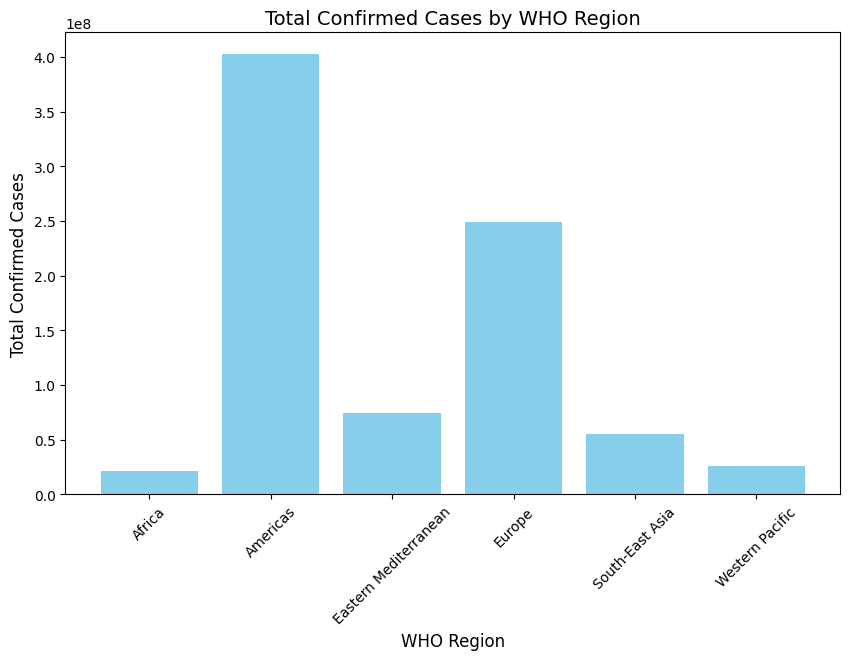

In [ ]:
# KPI
TCC_by_WHO = full_grouped.groupby('WHO Region').agg(Total_Confirmed=('Confirmed', 'sum')).reset_index()
print(f"Total Confirmed Cases by WHO Region is: {TCC_by_WHO}")

# Insight
plt.figure(figsize=(10, 6))
plt.bar(TCC_by_WHO['WHO Region'], TCC_by_WHO['Total_Confirmed'], color='skyblue')
plt.title('Total Confirmed Cases by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Confirmed Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()


###### 4.2. Total Active Cases By WHO Region

Total Active Cases by WHO Region is:               WHO Region  Total_Active
0                 Africa      10158119
1               Americas     225832458
2  Eastern Mediterranean      24108160
3                 Europe     106406678
4        South-East Asia      23629904
5        Western Pacific       6580031


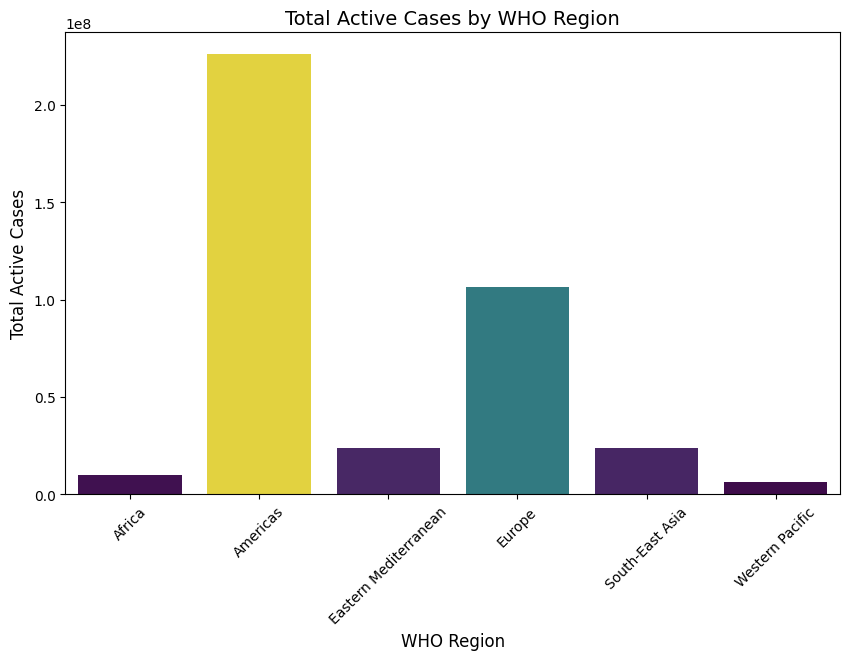

In [ ]:
# KPI
TAC_by_WHO = full_grouped.groupby(['WHO Region']).agg(Total_Active=('Active', 'sum')).reset_index()
print(f"Total Active Cases by WHO Region is: {TAC_by_WHO}")

# Insight
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Total_Active', hue='Total_Active', data=TAC_by_WHO, palette='viridis', legend = False)
plt.title('Total Active Cases by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Active Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###### 4.3. Active Proportion by WHO

Active Proportion by WHO Region:               WHO Region  Active Proportion %
4        South-East Asia            49.177713
2  Eastern Mediterranean            47.043648
1               Americas            42.683969
0                 Africa            42.553094
3                 Europe            41.921863
5        Western Pacific            36.953857


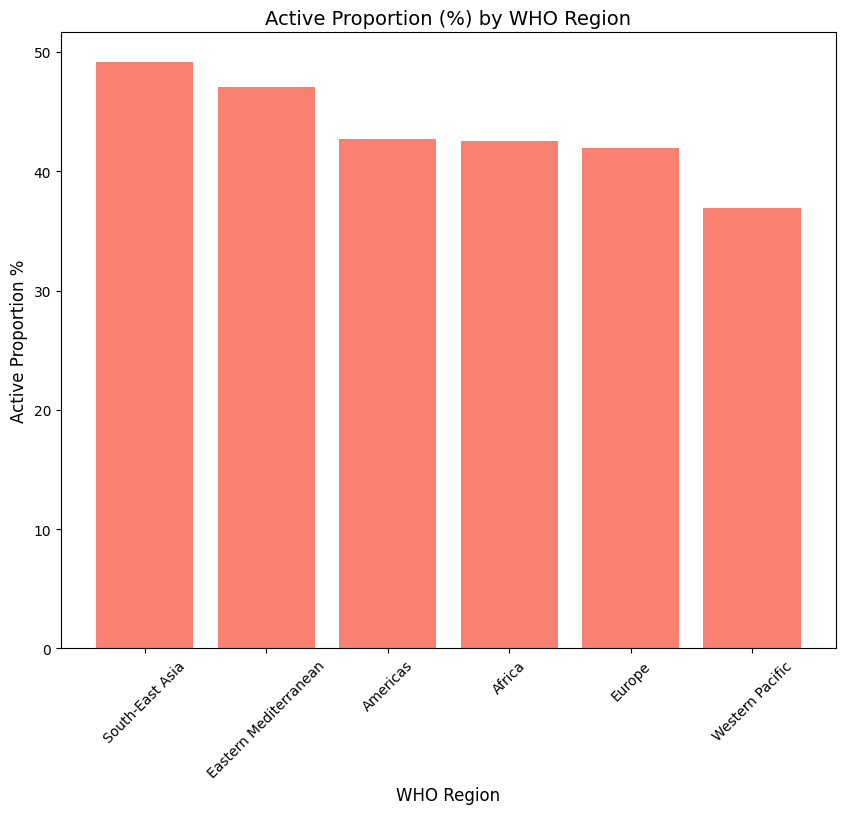

In [ ]:
# KPI
# Active Proportion by WHO Region
# Grouping data by WHO Region
active_data = full_grouped.groupby('WHO Region')[['Active Proportion %']].agg('mean').reset_index()

# Sort by recovery rate
active_data = active_data.sort_values(by='Active Proportion %', ascending=False)
print(f"Active Proportion by WHO Region: {active_data}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(active_data['WHO Region'], active_data['Active Proportion %'], color='salmon')
plt.title('Active Proportion (%) by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Active Proportion %', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

###### 4.4. Active Proportion by Country

Top 10 Countries by Active Proportion:             Country  Active Proportion %
32           Canada            93.511784
161          Sweden            88.950637
177  United Kingdom            82.727843
173              US            79.422237
120     Netherlands            72.633112
133     Philippines            68.179138
168     Timor-Leste            68.085106
117      Mozambique            67.866128
76         Honduras            64.826751
0       Afghanistan            64.534760


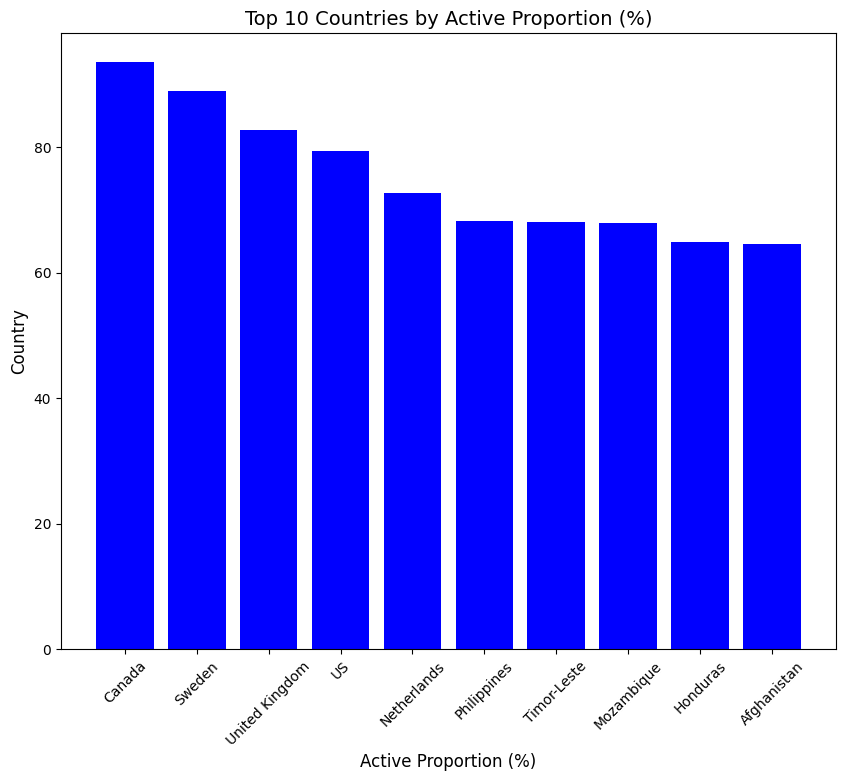

In [ ]:
# KPI
# Aggregate Active Proportion by country
country_aggregates = full_grouped.groupby('Country')[['Active Proportion %']].agg('mean').reset_index()

# Sort by Active Proportion
top10_countries = country_aggregates.nlargest(10, 'Active Proportion %')
print(f"Top 10 Countries by Active Proportion: {top10_countries}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(top10_countries['Country'], top10_countries['Active Proportion %'], color='blue')
plt.title('Top 10 Countries by Active Proportion (%)', fontsize=14)
plt.xlabel('Active Proportion (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###### 4.5. Total Recovered Cases by WHO Region

Total Recovered Cases by WHO Region is:               WHO Region  Total_Recovered
0                 Africa         11193730
1               Americas        157069444
2  Eastern Mediterranean         48050703
3                 Europe        123202075
4        South-East Asia         30030327
5        Western Pacific         18861950


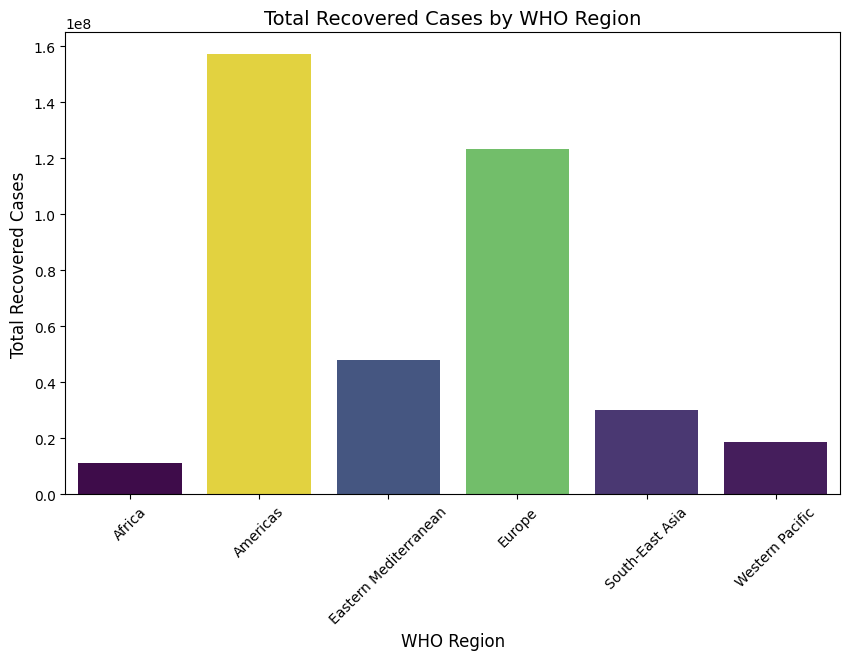

In [ ]:
# KPI
TRC_by_WHO = full_grouped.groupby(['WHO Region']).agg(Total_Recovered=('Recovered', 'sum')).reset_index()
print(f"Total Recovered Cases by WHO Region is: {TRC_by_WHO}")

# Insight
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Total_Recovered', hue='Total_Recovered', data=TRC_by_WHO, palette='viridis', legend = False)
plt.title('Total Recovered Cases by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Recovered Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()


###### 4.6. Recovery Rates by WHO Region

Recovery Rate by WHO Region:               WHO Region  Recovery Rate %
5        Western Pacific        50.475788
3                 Europe        35.387535
4        South-East Asia        32.602970
1               Americas        29.428861
2  Eastern Mediterranean        28.756952
0                 Africa        24.883316


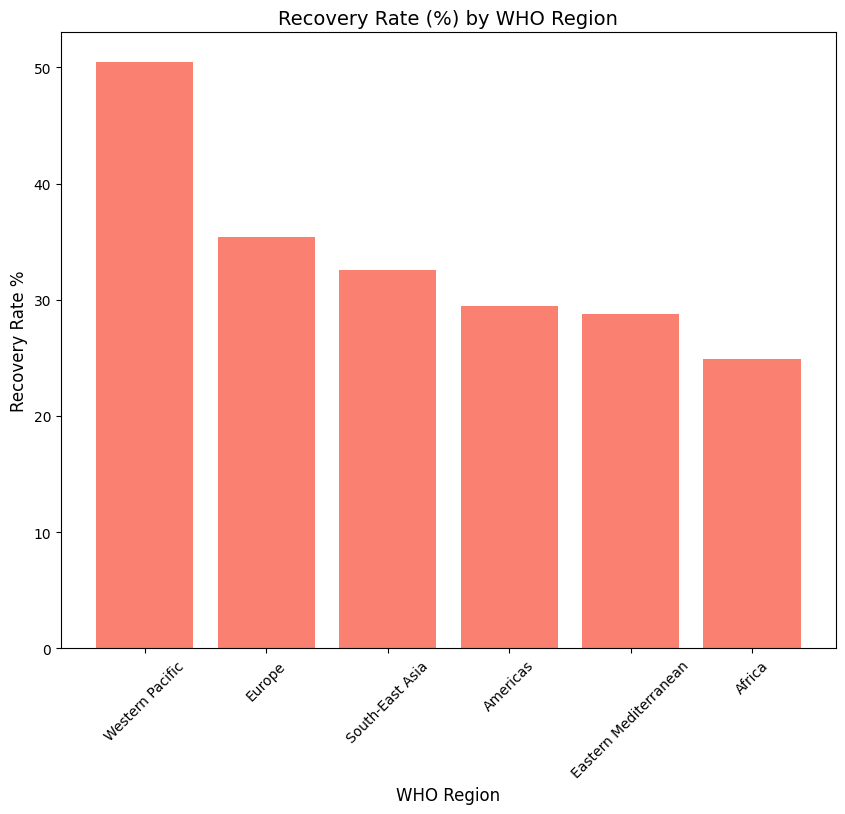

In [ ]:
# KPI
# Recovery Rates by WHO Region
# Grouping data by WHO Region
recovery_data = full_grouped.groupby('WHO Region')[['Recovery Rate %']].agg('mean').reset_index()

# Sort by recovery rate
recovery_data = recovery_data.sort_values(by='Recovery Rate %', ascending=False)
print(f"Recovery Rate by WHO Region: {recovery_data}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(recovery_data['WHO Region'], recovery_data['Recovery Rate %'], color='salmon')
plt.title('Recovery Rate (%) by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Recovery Rate %', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

###### 4.7. Recovery Rate by Country

Top 10 Countries by Recovery Rate:            Country  Recovery Rate %
36           China        73.426132
30        Cambodia        70.416266
167       Thailand        67.041067
181        Vietnam        66.566557
100  Liechtenstein        63.582219
68       Greenland        60.655665
155    South Korea        58.386514
24          Brunei        58.105005
105       Malaysia        58.006278
8        Australia        57.249149


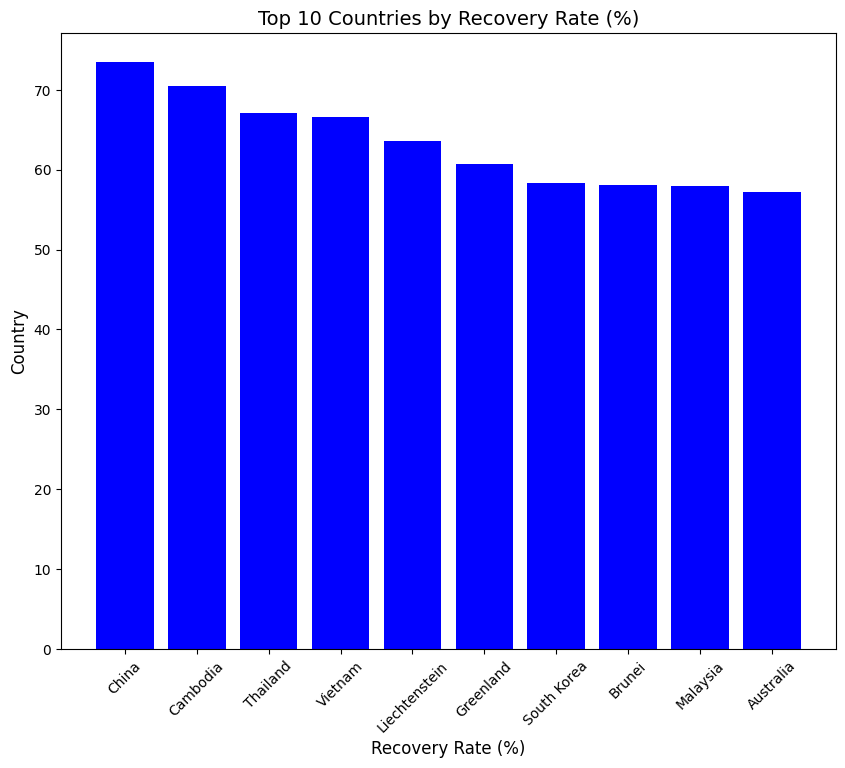

In [ ]:
# KPI
# Aggregate Recovery rate by country
country_aggregates2 = full_grouped.groupby('Country')[['Recovery Rate %']].agg('mean').reset_index()

# Sort by Recovery rate
top10_countries2 = country_aggregates2.nlargest(10, 'Recovery Rate %')
print(f"Top 10 Countries by Recovery Rate: {top10_countries2}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(top10_countries2['Country'], top10_countries2['Recovery Rate %'], color='blue')
plt.title('Top 10 Countries by Recovery Rate (%)', fontsize=14)
plt.xlabel('Recovery Rate (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()


###### 4.8. Total Deaths by WHO Region

Total Deaths by WHO Region is:               WHO Region  Total_Deaths
0                 Africa        439978
1               Americas      19359292
2  Eastern Mediterranean       1924029
3                 Europe      19271040
4        South-East Asia       1458134
5        Western Pacific        932430


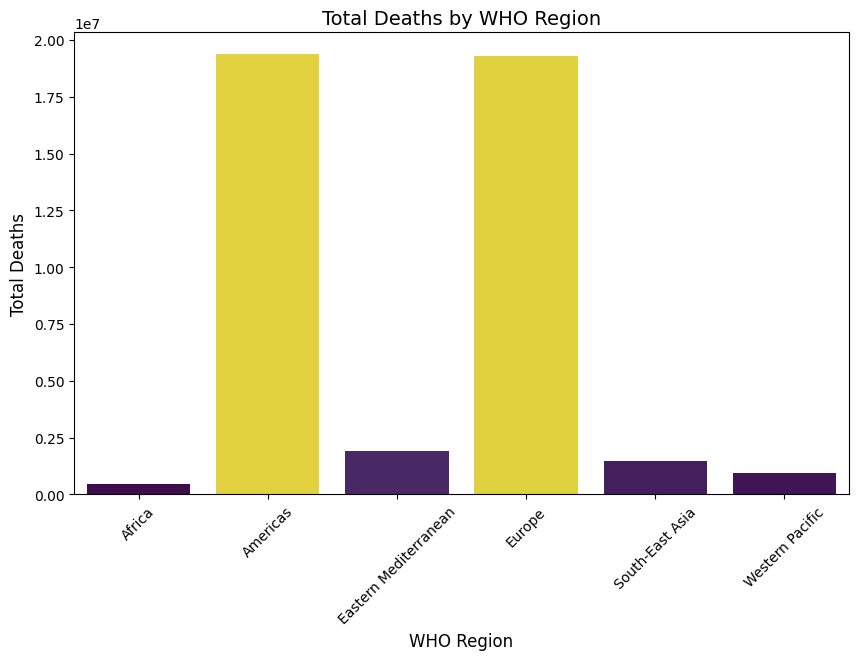

In [ ]:
# KPI
TD_by_WHO = full_grouped.groupby(['WHO Region']).agg(Total_Deaths=('Deaths', 'sum')).reset_index()
print(f"Total Deaths by WHO Region is: {TD_by_WHO}")

# Insight
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Total_Deaths', hue='Total_Deaths', data=TD_by_WHO, palette='viridis', legend = False)
plt.title('Total Deaths by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
###### 4.9. Mortality Rate by WHO

WHO Region by Mortality Rate:               WHO Region  Mortality Rate %
1               Americas          2.978355
3                 Europe          2.905267
2  Eastern Mediterranean          2.608492
0                 Africa          2.033892
5        Western Pacific          1.566365
4        South-East Asia          1.357615


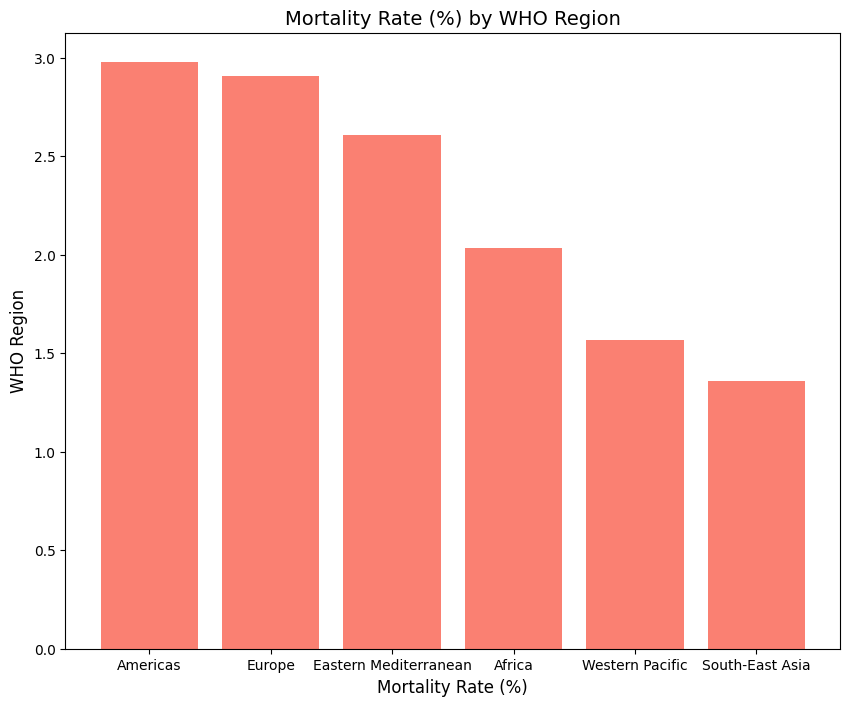

In [ ]:
# Mortality Rate by WHO Region
# Aggregate mortality rate by WHO Region
WHO_aggregates = full_grouped.groupby('WHO Region')[['Mortality Rate %']].agg('mean').reset_index()

# Sort by mortality rate
sorted_region = WHO_aggregates.nlargest(10, 'Mortality Rate %')
print(f"WHO Region by Mortality Rate: {sorted_region}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(sorted_region['WHO Region'], sorted_region['Mortality Rate %'], color='salmon')
plt.title('Mortality Rate (%) by WHO Region', fontsize=14)
plt.xlabel('Mortality Rate (%)', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.show()

In [ ]:
###### 4.10. Mortality Rate by Country

Top 10 Countries by Mortality Rate:             Country  Mortality Rate %
184           Yemen         11.184522
159           Sudan         10.357696
133     Philippines         10.345289
61           France         10.124110
85            Italy         10.119833
16          Belgium          9.681450
177  United Kingdom          9.533477
73           Guyana          8.388045
122       Nicaragua          8.065478
120     Netherlands          8.018745


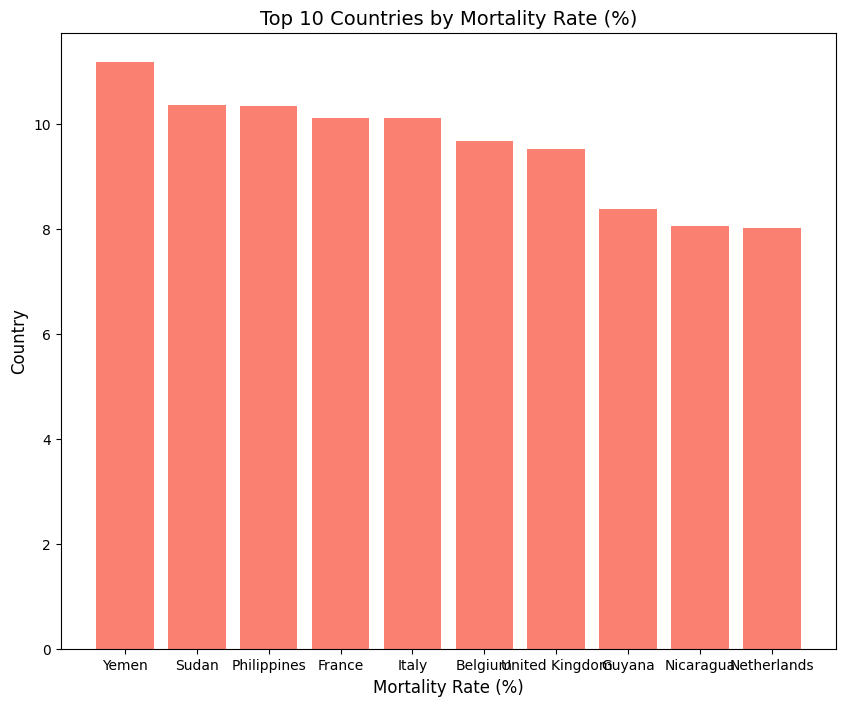

In [ ]:
# KPI
# Aggregate mortality rate by country
country_aggregates3 = full_grouped.groupby('Country')[['Mortality Rate %']].agg('mean').reset_index()

# Sort by mortality rate
top10_countries = country_aggregates3.nlargest(10, 'Mortality Rate %')
print(f"Top 10 Countries by Mortality Rate: {top10_countries}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(top10_countries['Country'], top10_countries['Mortality Rate %'], color='salmon')
plt.title('Top 10 Countries by Mortality Rate (%)', fontsize=14)
plt.xlabel('Mortality Rate (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [ ]:
###### 4.11. Daily Trend Over Time

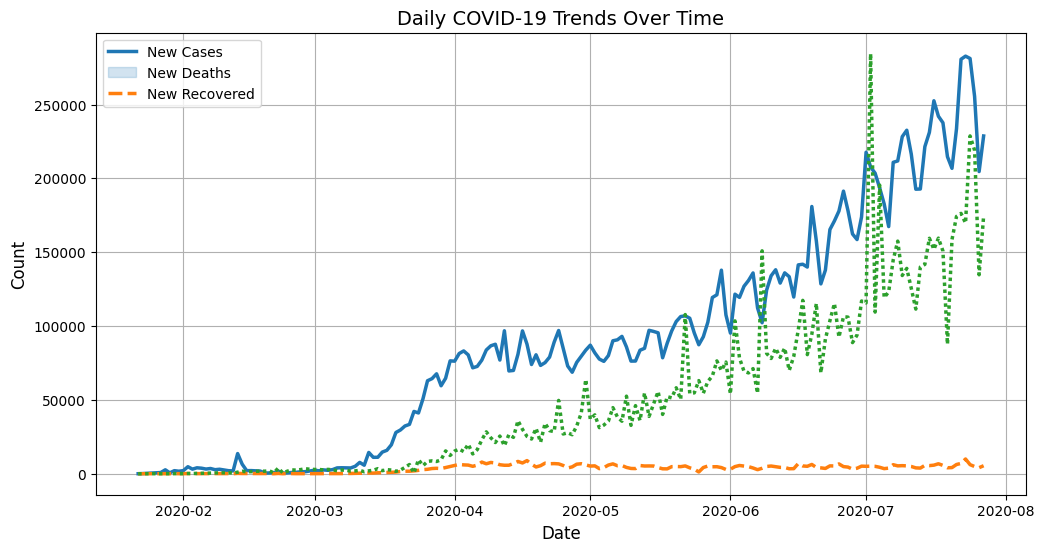

In [ ]:
# Group by Date to get global trends
daily_trend = full_grouped.groupby('Date')[['New cases', 'New deaths', 'New recovered']].sum()

# Plot trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trend, linewidth=2.5)

# Formatting
plt.title("Daily COVID-19 Trends Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["New Cases", "New Deaths", "New Recovered"])
plt.grid(True)

# Show the plot
plt.show()

###### 4.12. Monthly Trend Over Time

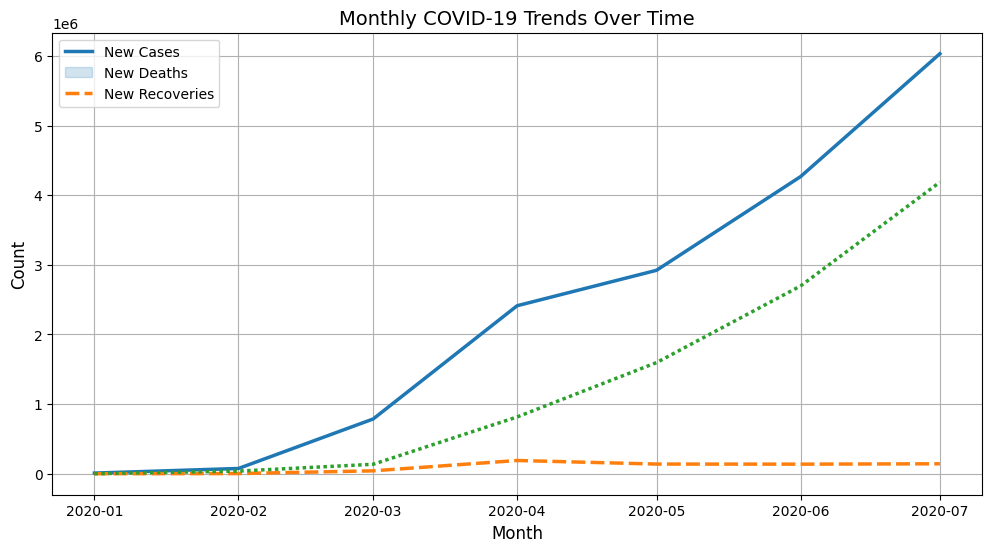

In [ ]:
# Create a 'Year-Month' column for grouping
full_grouped['Year-Month'] = full_grouped['Date'].dt.to_period('M')

# Group by 'Year-Month' to get monthly totals
monthly_trend = full_grouped.groupby('Year-Month')[['New cases', 'New deaths', 'New recovered']].sum()

# Convert period index back to datetime for plotting
monthly_trend.index = monthly_trend.index.to_timestamp()

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, linewidth=2.5)

# Formatting
plt.title("Monthly COVID-19 Trends Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["New Cases", "New Deaths", "New Recoveries"])
plt.grid(True)

# Show the plot
plt.show()

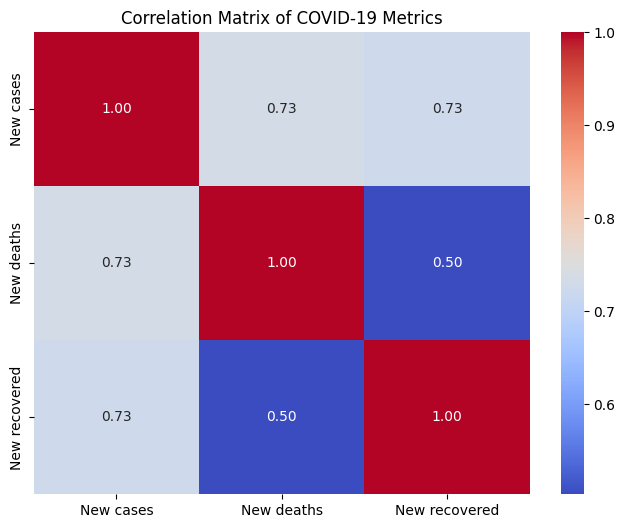

In [ ]:
# Calculate the correlation matrix
correlation_matrix = full_grouped[['New cases', 'New deaths', 'New recovered']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()

### 5. Analysis For Africa

In [ ]:
# Filter for Africa
africa_data = full_grouped[full_grouped['WHO Region'] == 'Africa'].reset_index(drop=True)
africa_data.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Year,Month,Day,Week,Quarter,Mortality Rate %,Recovery Rate %,Active Proportion %,Year-Month
0,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
1,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
2,2020-01-22,Benin,0,0,0,0,0,0,0,Africa,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
3,2020-01-22,Botswana,0,0,0,0,0,0,0,Africa,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
4,2020-01-22,Burkina Faso,0,0,0,0,0,0,0,Africa,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01


###### 5.1. Trend Analysis Over Time for Africa

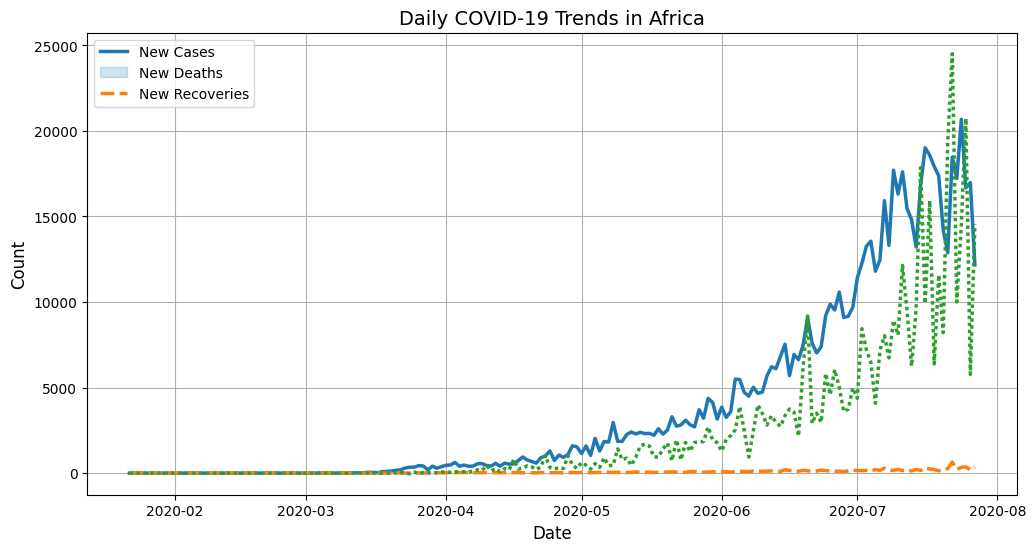

In [ ]:
# KPI
# Filter for African countries
combined_data_africa = full_grouped[full_grouped['WHO Region'] == 'Africa']

# Group by date to calculate daily trends for Africa
africa_daily_trend = combined_data_africa.groupby('Date')[['New cases', 'New deaths', 'New recovered']].sum()

# Plot daily trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=africa_daily_trend, linewidth=2.5)

# Formatting
plt.title("Daily COVID-19 Trends in Africa", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["New Cases", "New Deaths", "New Recoveries"])
plt.grid(True)

# Show the plot
plt.show()

### 6. Analysis for Nigeria

In [ ]:
# Filter for Nigeria
nigeria_data = full_grouped[full_grouped['Country'] == 'Nigeria']
nigeria_data.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Year,Month,Day,Week,Quarter,Mortality Rate %,Recovery Rate %,Active Proportion %,Year-Month
124,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
311,2020-01-23,Nigeria,0,0,0,0,0,0,0,Africa,2020,January,Thursday,4,1,0.0,0.0,0.0,2020-01
498,2020-01-24,Nigeria,0,0,0,0,0,0,0,Africa,2020,January,Friday,4,1,0.0,0.0,0.0,2020-01
685,2020-01-25,Nigeria,0,0,0,0,0,0,0,Africa,2020,January,Saturday,4,1,0.0,0.0,0.0,2020-01
872,2020-01-26,Nigeria,0,0,0,0,0,0,0,Africa,2020,January,Sunday,4,1,0.0,0.0,0.0,2020-01


###### 6.1 Trend Analysis Over Time for Nigeria

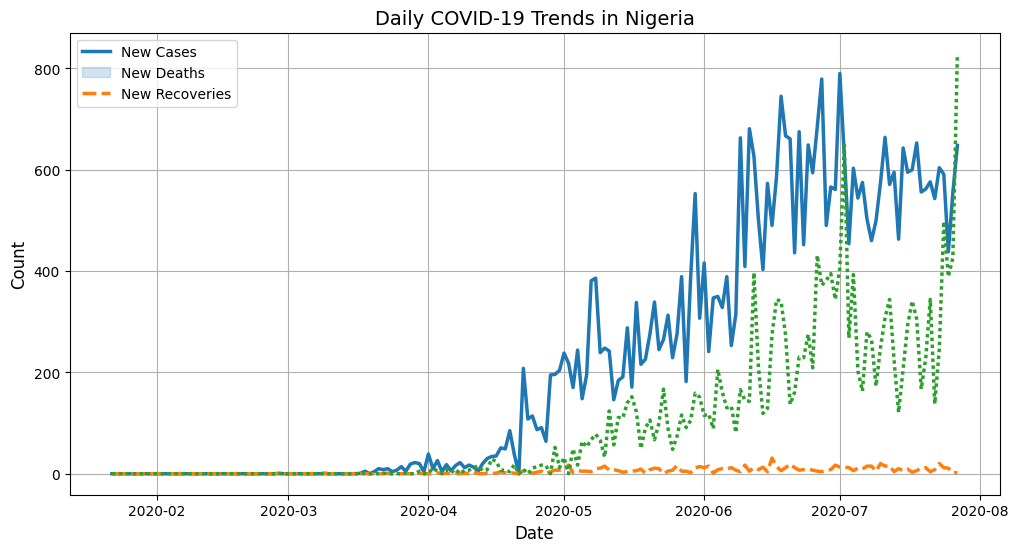

In [ ]:
# KPI
# Group by Date to calculate daily trends for Nigeria
nigeria_daily_trend = nigeria_data.groupby('Date')[['New cases', 'New deaths', 'New recovered']].sum()

# Plot daily trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=nigeria_daily_trend, linewidth=2.5)

# Formatting
plt.title("Daily COVID-19 Trends in Nigeria", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["New Cases", "New Deaths", "New Recoveries"])
plt.grid(True)

# Show the plot
plt.show()

### 7. Building The Model

In [ ]:

   import numpy as np
   import matplotlib.pyplot as plt
   from statsmodels.tsa.arima.model import ARIMA
   from statsmodels.tsa.stattools import adfuller
   from sklearn.metrics import mean_squared_error

###### 7.1. Data Selection.

In [ ]:
nigeria_cases = nigeria_data[['Date', 'New cases']].set_index('Date')

###### 7.2. Check for Stationarity.

In [ ]:
def test_stationarity(timeseries):
       # Perform Dickey-Fuller test:
       print('Results of Dickey-Fuller Test:')
       dftest = adfuller(timeseries, autolag='AIC')
       dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
       for key, value in dftest[4].items():
           dfoutput['Critical Value (%s)' % key] = value
       print(dfoutput)

test_stationarity(nigeria_cases['New cases'])

Results of Dickey-Fuller Test:
Test Statistic                   0.089294
p-value                          0.965323
#Lags Used                       6.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


###### 7.3. Differencing.

In [ ]:
nigeria_cases['New cases_diff'] = nigeria_cases['New cases'] - nigeria_cases['New cases'].shift(1)
nigeria_cases = nigeria_cases.dropna()  # Remove the first row (NaN due to shift)
test_stationarity(nigeria_cases['New cases_diff'])

Results of Dickey-Fuller Test:
Test Statistic                -9.505799e+00
p-value                        3.350076e-16
#Lags Used                     5.000000e+00
Number of Observations Used    1.810000e+02
Critical Value (1%)           -3.467005e+00
Critical Value (5%)           -2.877644e+00
Critical Value (10%)          -2.575355e+00
dtype: float64


###### 7.4. Split Data into Train and Test sets.

In [ ]:
train_data = nigeria_cases[:-30]
test_data = nigeria_cases[-30:]

###### 7.5. Determine ARIMA Model Order

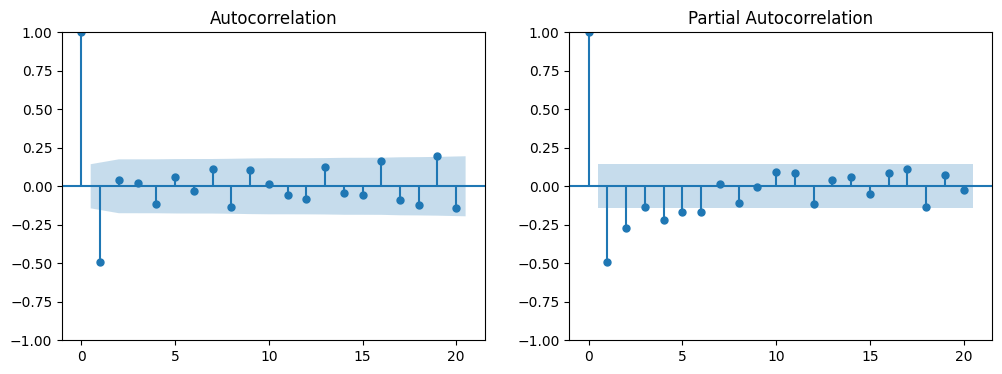

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(nigeria_cases['New cases_diff'], lags=20, ax=axes[0])  # Autocorrelation Function
plot_pacf(nigeria_cases['New cases_diff'], lags=20, ax=axes[1]) # Partial Autocorrelation Function
plt.show()

###### 7.6. Build and Train the ARIMA Model.

In [ ]:
model = SARIMAX(train_data['New cases'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


###### 7.7. Make predictions.

In [ ]:
predictions = model_fit.predict(start=len(train_data), end=len(nigeria_cases)-1)

###### 7.8. Model Evaluation.

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['New cases'], predictions))
print(f"RMSE: {rmse}")

RMSE: 231.20845285219536


###### 7.9. Visualize Predictions.

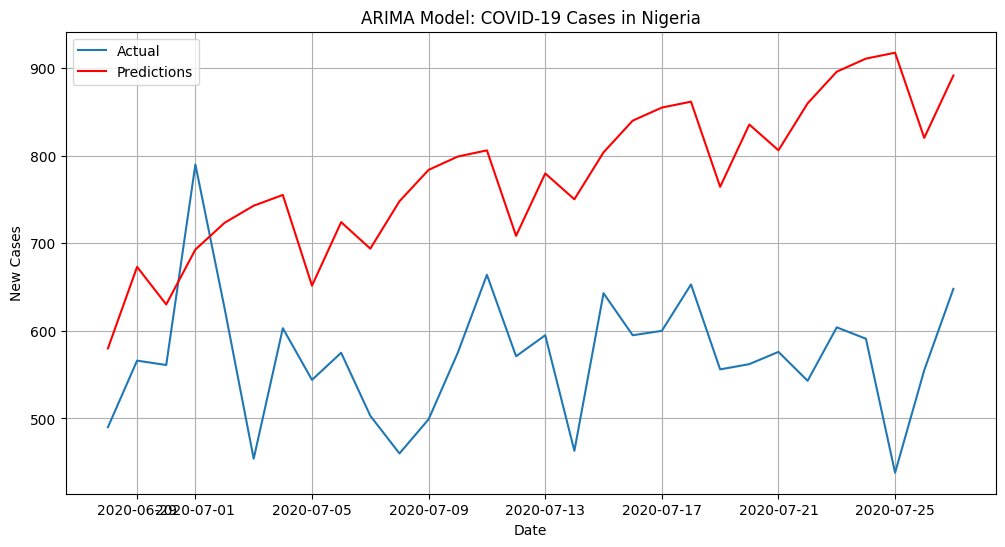

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['New cases'], label='Actual')
plt.plot(predictions, label='Predictions', color='red')
plt.title('ARIMA Model: COVID-19 Cases in Nigeria')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xafmeqo/2ghs6pbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xafmeqo/s0u6g1xh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36521', 'data', 'file=/tmp/tmp0xafmeqo/2ghs6pbz.json', 'init=/tmp/tmp0xafmeqo/s0u6g1xh.json', 'output', 'file=/tmp/tmp0xafmeqo/prophet_modelnsl5u4va/prophet_model-20250227151432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 182.4058935325367


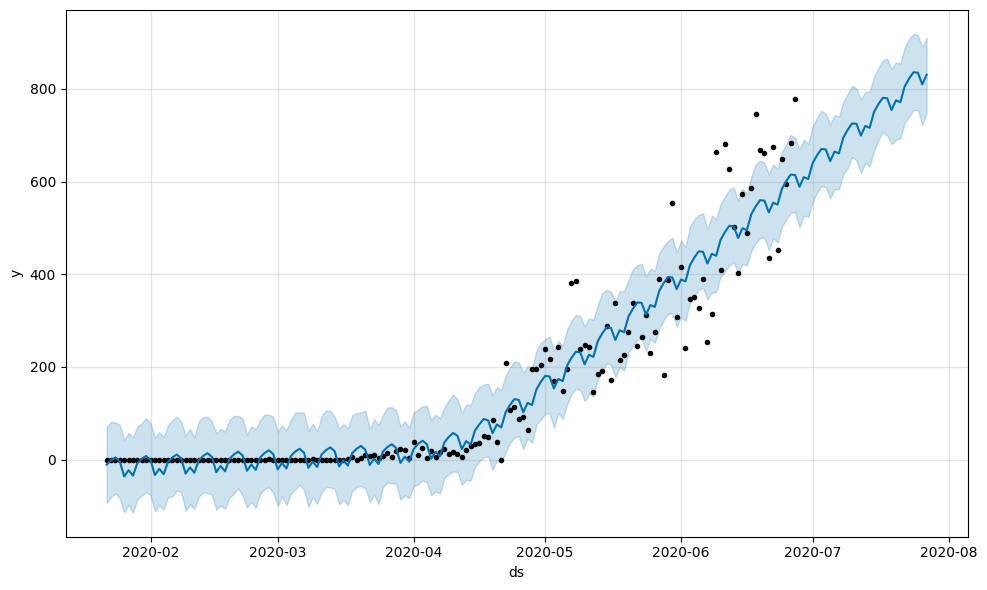

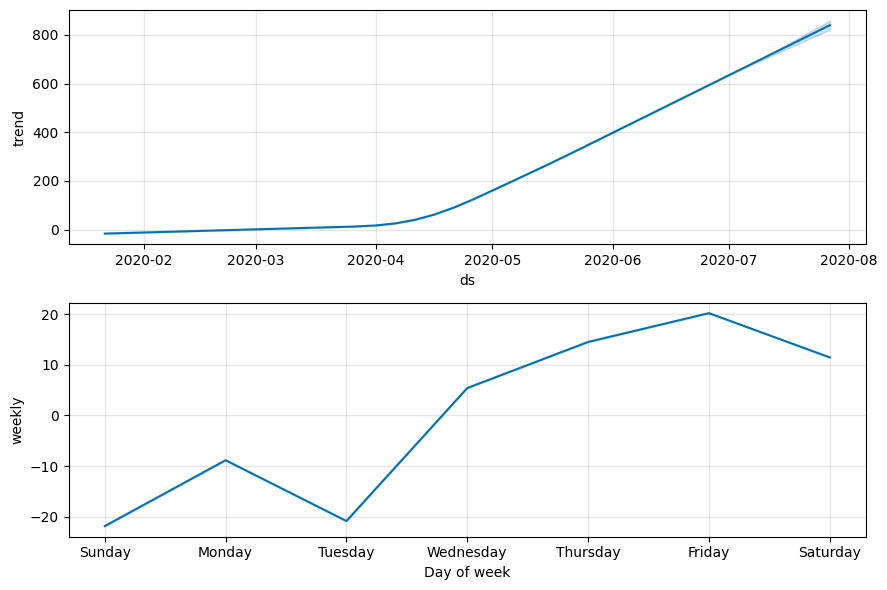

In [ ]:
# ... Trying out Prophet ...
# Building The Model (Prophet)
# Data Selection.
nigeria_prophet_data = nigeria_data[['Date', 'New cases']].copy()
nigeria_prophet_data.rename(columns={'Date': 'ds', 'New cases': 'y'}, inplace=True)

# Split Data into Train and Test sets.
train_data_prophet = nigeria_prophet_data[:-30]
test_data_prophet = nigeria_prophet_data[-30:]

# Build and Train the Prophet Model.
model_prophet = Prophet()  # You can customize seasonality and holidays here
model_prophet.fit(train_data_prophet)

# Make Predictions.
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Model Evaluation.
predictions_prophet = forecast['yhat'][-30:] # Get predictions for the test set period
rmse_prophet = np.sqrt(mean_squared_error(test_data_prophet['y'], predictions_prophet))
print(f"Prophet RMSE: {rmse_prophet}")

# Visualize Predictions.
fig1 = model_prophet.plot(forecast)
fig2 = model_prophet.plot_components(forecast)

Hybrid Model RMSE: 191.70562752200956


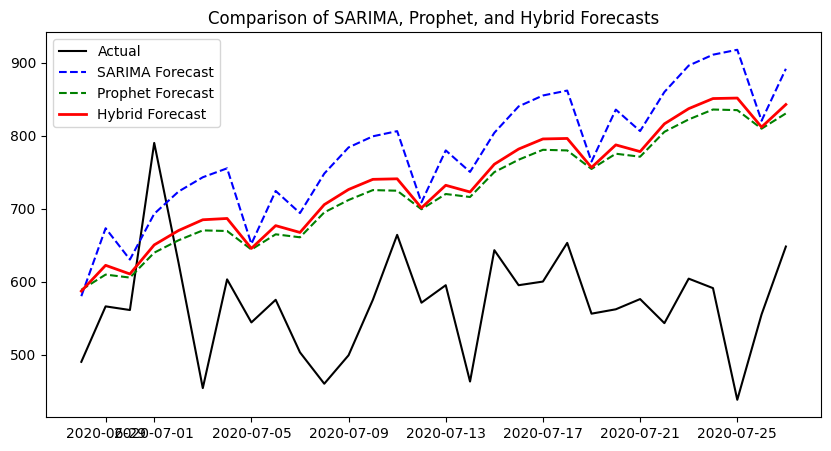

In [ ]:
# --- Merge and Hybrid Forecast ---
# Align SARIMA and Prophet forecasts
# Get only the 'yhat' column (predicted values) from Prophet forecast
# Filter Prophet predictions to match the dates in test_data
prophet_predictions = forecast[forecast['ds'].isin(test_data.index)]['yhat']

# Compute Hybrid Forecast (Weighted Average: 80% Prophet, 20% SARIMA)
# Ensure both predictions and prophet_predictions have the same index
hybrid_forecast = (0.2 * predictions) + (0.8 * prophet_predictions.values)

# --- Evaluate Hybrid Model ---
rmse_hybrid = np.sqrt(mean_squared_error(test_data['New cases'], hybrid_forecast))
print(f"Hybrid Model RMSE: {rmse_hybrid}")

# --- Visualize Predictions ---

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data['New cases'], label="Actual", color='black')
plt.plot(test_data.index, predictions, label="SARIMA Forecast", color='blue', linestyle="dashed")
plt.plot(test_data.index, prophet_predictions, label="Prophet Forecast", color='green', linestyle="dashed")  # Use prophet_predictions for plotting
plt.plot(test_data.index, hybrid_forecast, label="Hybrid Forecast", color='red', linewidth=2)
plt.legend()
plt.title("Comparison of SARIMA, Prophet, and Hybrid Forecasts")
plt.show()